<h3>КРИТЕРІЙ ПІРСОНА ДЛЯ ПОРІВНЯННЯ ДЕКІЛЬКОЇ ГРУП ЗА РОЗПОДІЛЕННЯМ ОЗНАКИ</h3>

1. Обрати реальні дані з kaggle або сгенерувати випадкові дані, що містять розподіл деякої ознаки в двох групах.

In [44]:
import pandas as pd
import seaborn as sns
%matplotlib inline

drugged_memory_test = pd.read_csv('Islander_data.csv')
drugged_memory_test.head()

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1


Интерес вызывает тот факт, что тест проводился и на обычном сахаре, то есть на эффект Плацебо.

Drugs :

A - Alprazolam (Xanax, Long-term)

T - Triazolam (Halcion, Short-term)

S - Sugar Tablet (Placebo)


Больше здесь : https://www.kaggle.com/steveahn/memory-test-on-drugged-islanders-data

In [45]:
classes = ["Alprazolam", "Triazolam", "Sugar Tablet"]
table = pd.DataFrame(columns = ["Drug", "Better memory", "Worse memory"])
table["Drug"] = classes
for i in range(3):
    count = 0
    count_all = 0
    for j in range(len(drugged_memory_test)):
        if (drugged_memory_test['Drug'][j] == classes[i][0]):
            count_all += 1
            if (drugged_memory_test['Diff'][j] > 0):
                count += 1
    table['Better memory'][i] = count
    table['Worse memory'][i] = count_all - count
    
table

,Drug,Better memory,Worse memory
0,Alprazolam,47,20
1,Triazolam,33,32
2,Sugar Tablet,34,32


2. Побудувати графік, що відображає розподіл ознак в групах.

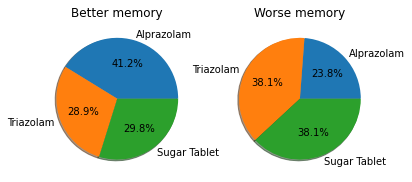

In [46]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2)

axs[0].pie(table['Better memory'], labels = classes, autopct='%1.1f%%',
        shadow=True)
axs[0].set_title('Better memory')

axs[1].pie(table['Worse memory'], labels = classes, autopct='%1.1f%%',
        shadow=True)
axs[1].set_title('Worse memory')

plt.show()

На "пирогах" видно, что Alprazolam предположительно имеет тенденцию улучшать память. Так ли это - поможет узнать критерий Пирсона.

3. Написати функції, що оцінює зв'язок між ознакою та групою за критерієм Пірсона. Функція має оцінювати розбіжність на двох рівнях - 0,001 та 0,05, в залежністі від параметру significant_level, що передається в неї.

In [50]:
def Pirson(data, significant_level):
    keys = data.keys()
    hi2 = 0
    suma = sum(data[keys[1]])
    if sum(data[keys[1]]) != sum(data[keys[2]]):
        for i in range(len(data)):
            data[keys[1]][i] = (data[keys[1]][i]/suma) * sum(data[keys[2]])
    for i in range(len(data)):
        subtraction = ((data[keys[1]][i] - data[keys[2]][i])**2)/data[keys[2]][i]
        hi2 += subtraction
    r = len(data) - 1
    hi2_table = pd.read_excel('Pirson.xlsx').iloc[r, 1 if significant_level == 0.01 else 2]
    print("hi^2 = ", hi2)
    print("hi^2 табличне = ", hi2_table)
    if (hi2 > hi2_table):
        return "Статистична розбіжність є."
    else:
        return "Статистичної розбіжності немає."

4. Перевірити розбіжність між групами на даних з п. 1. В результаті сформувати таблицю спряженості наступного вигляду:

Ознака  | Група 1 | Група 2  | 
------------- | ------------- |--------- |
Градація ознаки 1  | $n_{11}  $   | $n_{21}$   |
Градація ознаки 2  | $n_{12}$   | $n_{22}$   |
Градація ознаки 3  | $n_{13}$   | $n_{23}$   |

Додати до таблиці стовбчики з відсотовим розподілом по градаціям всередині груп.

Окремо вивести результати роботи критерію (чи є статистична розбіжність між групами).

In [51]:
keys = table.keys()
sum_1 = sum(table[keys[1]])
sum_2 = sum(table[keys[2]])

table["% Better memory"] = [table[keys[1]][i]/sum_1 * 100 for i in range(len(table))]
table["% Worse memory"] = [table[keys[2]][i]/sum_2 * 100 for i in range(len(table))]

table

,Drug,Better memory,Worse memory,% Better memory,% Worse memory
0,Alprazolam,34.6316,20,41.228070,23.809524
1,Triazolam,24.3158,32,28.947368,38.095238
2,Sugar Tablet,25.0526,32,29.824561,38.095238


In [52]:
Pirson(table, 0.05)

hi^2 =  14.057686980609423
hi^2 табличне =  6


'Статистична розбіжність є.'

<h4>Это значит что, тенденция подтверждается и Alprazolam действительно имеет свойства улучшения памяти.</h4>
       
<h4>Круто быть data scientist'ом :)</h4>